# Introduction To Statistical Tests

## Prof. Dr. Teena Hasan
teena.hassan@h-brs.de

## Ritwik Sinha
ritwik.sinha@smail.inf.h-brs.de


### Hochschule Bonn-Rhein-Sieg
#### Human-Centered Interaction in Robotics

Reference: https://resources.nu.edu/statsresources/ttest

# Learning Goals

* Data visualisation
* Hypothesis
* Statistical test
* Normality test
* Reporting results



# Data visualization

## Experiment: Weight Gain


### References:

* Moore, D. S., McCabe, G. P., and Craig, B. A. (2012). Introduction to the Practice of Statistics (7th ed.). New York: Freeman.
* Levine, J. A., Eberhardt, N. L., and Jensen, M. D. (1999) Role of nonexcercise activity thermogenesis in resistance to fat gain in humans. Science, 283:212-214.



### Description:  
"Weight Gain", provides weights of 16 participants before and after an eight-week period of excessive calorie intake (Moore et al., 2012, p. 425).

### Hypothesis:
We will test the hypothesis that 1000 excess calorie intake per day over 8 weeks results in 16 pounds (approximately 7.2 kilograms) weight increase.


### Variables:

    Weight Before - Weight in pounds (lb) measured before eight weeks of excessive calorie intake.
    Weight After - Weight in pounds (lb) measured after eight weeks of excessive calorie intake.
    Difference - Weight After - Weight Before.



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
weight_gain_data = pd.read_csv('https://raw.githubusercontent.com/jasp-stats/jasp-desktop/4527546659fdbd0849261f22ec84e9db76adc49d/Resources/Data%20Sets/Data%20Library/2.%20T-Tests/Weight%20Gain.csv')
weight_gain_data.head()

,Weight Before,Weight After,Difference
0,122.54,135.74,13.20
1,120.78,129.36,8.58
2,131.12,145.20,14.08
3,137.06,145.64,8.58
4,163.24,173.80,10.56


## Plotting

* Try plotting the data to get a complete picture

![](./DinoSequentialSmaller.gif)

Matejka, J., & Fitzmaurice, G.W. (2017). Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems.

# Plots

1. Scatter plot
2. Box PLot
3. Density Plots
4. Rain cloud plots

# Scatter Plot

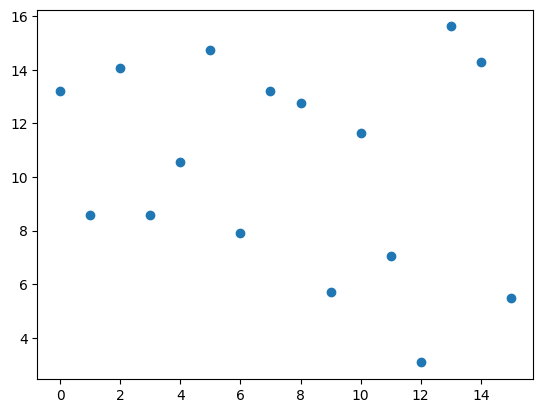

In [5]:
# Scater plot
plt.scatter(range(weight_gain_data.Difference.size), weight_gain_data.Difference)

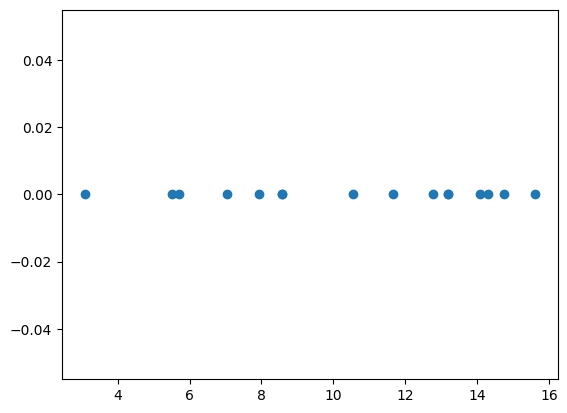

In [6]:
plt.scatter( weight_gain_data.Difference, np.zeros(weight_gain_data.Difference.size))

# Box Plot

<Axes: xlabel='Difference'>

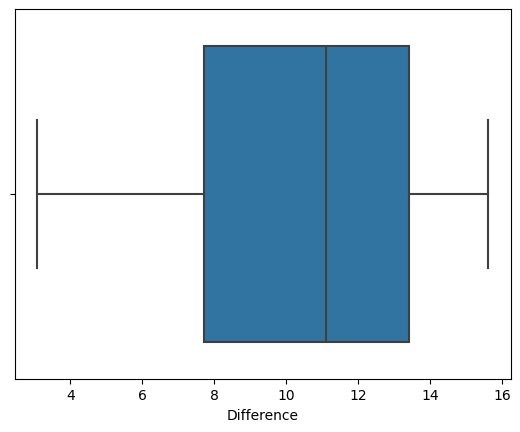

In [7]:
#Box plot
sns.boxplot(x=weight_gain_data["Difference"])

# Box plot

![](https://chartio.com/assets/79165a/tutorials/charts/box-plots/e30a92b3850d486bef6d0752caaa3d110944b25c9ef3043d821a4998c32bb526/box-plot-construction.png)

* https://chartio.com/learn/charts/box-plot-complete-guide/

In [8]:
sns.boxplot(data=weight_gain_data[["Weight Before", "Weight After"]])

AttributeError: 'DataFrame' object has no attribute 'iteritems'

<Axes: >

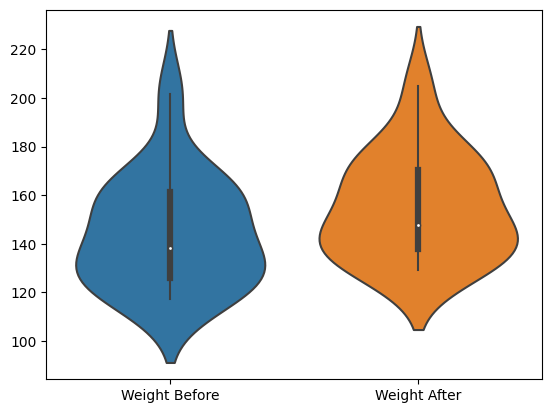

In [ ]:
sns.violinplot(data=weight_gain_data[["Weight Before", "Weight After"]])

# Density plot

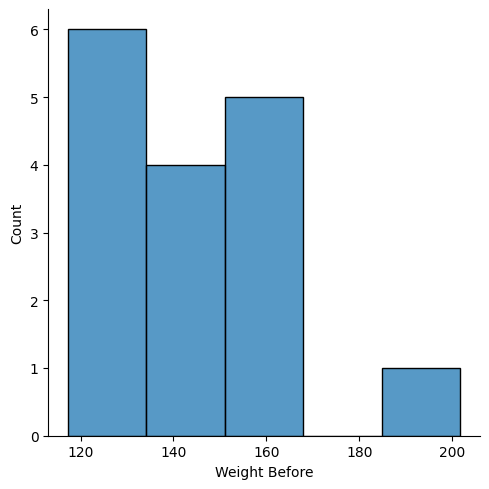

In [ ]:
sns.displot(data=weight_gain_data, x="Weight Before")

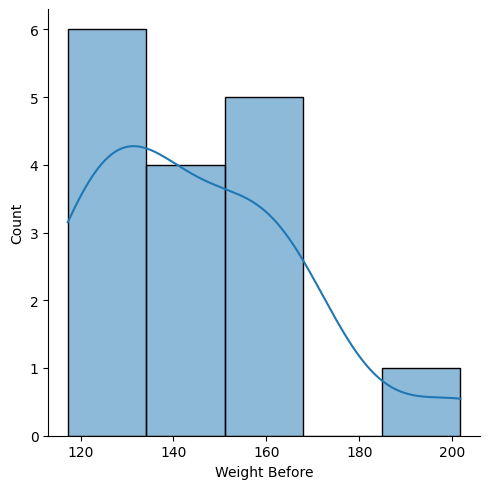

In [ ]:
sns.displot(data=weight_gain_data, x="Weight Before", kde=True)

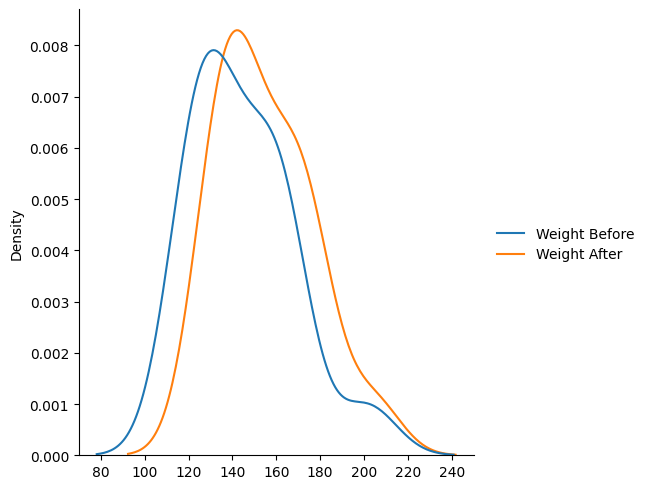

In [ ]:
sns.displot(data=weight_gain_data[["Weight Before", "Weight After"]], kind='kde')

# Rain cloud Plot

* Combining all the thre plots together.
* scatter + density + box plot

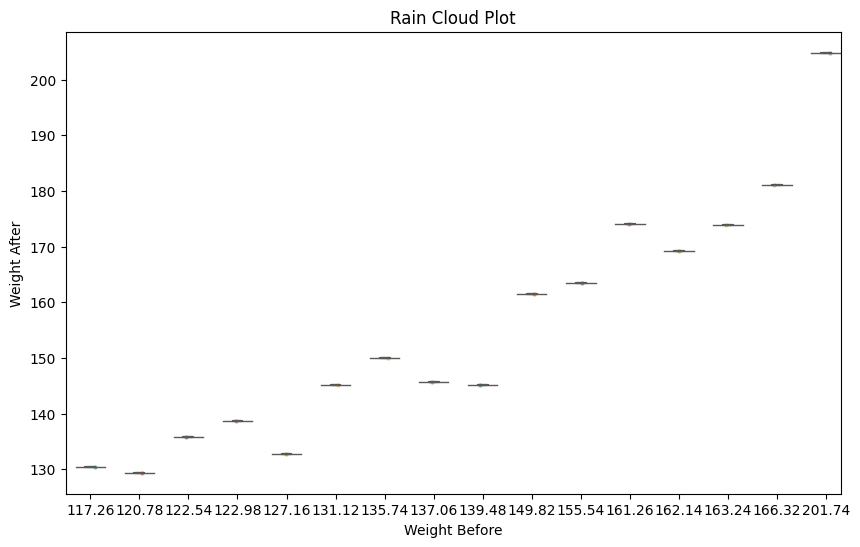

In [ ]:
plt.figure(figsize=(10, 6))
ax = pt.RainCloud(data=weight_gain_data, x='Weight Before', y='Weight After', width_viol=0.6, width_box=0.2)

ax.set_title('Rain Cloud Plot')
ax.set_xlabel('Weight Before')
ax.set_ylabel('Weight After')

plt.show()


# Hypothesis

* States a testable prediction or relationship based on the research question.

* Simply put, a hypothesis is a statement which makes a prediction about something which is not proven. It is a kind of educated guess

* You need a hypothesis when you want to prove something through experimentation.


## Null Hypothesis

* The null hypothesis is a statement that suggests there is no significant difference, effect, or relationship between the variables being studied.
* Used for testing to assess whether any observed results are due to chance or randomness.
* They simply propose the absence of a significant effect or relationship.
* The formulation depends on the research question and the specific hypothesis being tested.
* It might involve words like "no difference," "no effect," "no association,"

# Statistical Testing for Evaluating Experiments

* Deals with the relationship between the value of data, its variance, and the confidence of a conclusion

## A typical situation:
* Existing technique A
* You developed a new technique B
* Key question: Is B better than A?



# Evaluating Experiments

## 1.  Define a performance measure, e.g.
* Run-time
* Error
* Accuracy
* Robustness (success rate, MTBF, …)

## 2. Collect data d
* Run both techniques on the data d
* How to compare the obtained results
$A(d), B(d)$?



# 1st Example
## Scenario
* A, B are two HRI techniques
* Score is the audience response time
* Data d is a given map, start and goal pose

## Example
* A(d) = 0.5 s
* B(d) = 0.6 s What does that mean?

# 2nd Example

* Same scenario but four tasks

## Example
* A(d) = 0.5 s, 0.4 s, 0.6 s, 0.4 s
* B(d) = 0.4 s, 0.3 s, 0.6 s, 0.5 s

## Mean of the response time is
* $μ_A$ = 1.9 s/4 = 0.475 s
* $μ_B$ = 1.8 s/4 = 0.45 s

Is B really better than A?


# Is B better than A?
* $μ_A$ = 0.475 s, $μ_B$ = 0.45 s
* $μ_A$ > $μ_B$, so B is better than A?!
* We just evaluated four tests, thus
$μ_A$ and $μ_B$ are rough estimates only
* We saw too few data to make statements with high confidence
* How can we make a confident statement that B is better than A?



# Hypothesis Testing
> “Answer a yes-no question about a population and assess that the answer is wrong.” [Cohen’ 95]

* Example: To test that B is different from A, assume they are truly equal.

Then, assess the probability of the obtained result. If the probability is small, reject the hypothesis.


# The Null Hypothesis $H_0$

* The null hypothesis is the hypothesis that one wants to reject by analyzing data (from experiments)
* $H_0$ is the default state
* A statistical test can never proof $H_0$
* **A statistical test can only reject or fail to reject $H_0$**
* Example: to show that method A is better than B, use $H_0$: A=B


# Typical/Popular Null Hypotheses

### Example 1 : Comparing one sample to a known or hypothesized population mean.

 $$ H_0 : \mu = 0 $$
 $ H_1 : \mu \neq 0 $  (two-tailored test )

 $ H_1 : \mu < 0 $  (one-tailored test )

 $ H_1 : \mu > 0 $  (one-tailored test )



### Example 2 : Testing relationships between two or more variables

 $$ H_0 : \mu_1 = \mu_2 $$
 $ H_1 : \mu_1 \neq \mu_2 $  (two-tailored test )

 $ H_1 : \mu_1 < \mu_2 $  (one-tailored test )


 $ H_1 : \mu_1 > \mu_2 $  (one-tailored test )


# List of Tests


* [1] https://jasp-stats.org/wp-content/uploads/2020/11/Statistical-Analysis-in-JASP-A-Students-Guide-v14-Nov2020.pdf
* [2] https://jasp-stats.org/wp-content/uploads/2020/11/Data-for-handbook-upload.zip
* https://jasp-stats.org/download/
* https://docs.scipy.org/doc/scipy/reference/stats.html


# Student’s t-tests

Here we discuss the cases in which we use different types of t-tests to analyse the data.

## Assumptions

Making sure the data you wish to study can be analysed using a t-test is one step in the process when you decide to use one for your data analysis. This is necessary because a t-test should only be used if the data "passes" all of the presumptions needed for it to yield a meaningful result.


# 1. One sample t-test
Research is normally carried out in sample populations, but how close does the sample reflect the
whole population? The parametric one-sample t-test determines whether the sample mean is
statistically different from a known or hypothesized population mean.
The null hypothesis (Ho) tested is that the sample mean is equal to the population mean.

* Given a µ and σ of a population
* Test if a sample (from the population) has a significantly different mean than the population
* Sample of size N

 $$ H_0 : \mu = K $$
 $ H_1 : \mu \neq K $  (two-tailored test )

 $ H_1 : \mu < K $  (one-tailored test )

 $ H_1 : \mu > K $  (one-tailored test )

## One sample t-test: Assumptions

* Dependent variable measured at interval or ratio level (i.e., continuous).
*  Independently generated samples (i.e., data points are not correlated/related)
*  The population distribution is Gaussian (otherwise the t-distribution is not the correct choice)
*  Mean is known
* No significant outliers.

### Comments
*  The t-Test is quite robust under non-Gaussian distributions
*  Often a 95% or 99% confidence (=5% or 1% significance) level is used
* t-Test is one of the most frequently used tests in science

In [ ]:
from scipy import stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


In [ ]:
brain_data = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
brain_data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [ ]:
brain_data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [ ]:

stats.ttest_1samp(brain_data['VIQ'], popmean=4)      

TtestResult(statistic=29.016872557556965, pvalue=5.151093741830535e-28, df=39)

# 2. Independent-samples t-test or two sample t-test

It compares the means between two unrelated groups on the same continuous, dependent variable.

* Example: Compare two estimation procedures (operating on potentially different data sets)
* Typical Hypotheses
 $$ H_0 : \mu_1 = \mu_2 $$

 $ H_1 : \mu_1 \neq \mu_2 $  (two-tailored test )

 $ H_1 : \mu_1 < \mu_2 $  (one-tailored test )

 $ H_1 : \mu_1 > \mu_2 $  (one-tailored test )


* This test produces a t-score which is a ration of the differences between the two groups and the differences within the two groups:
* A large t-score indicates that there is a greater difference between groups. The smaller the t-score, the more similarity there is between groups.
* A t-score of 5 means that the groups are five times as different from each other as they are within each other.
* The null hypothesis (Ho) tested is that the population means from the two unrelated groups are equal

In [ ]:
female_viq = brain_data[brain_data['Gender'] == 'Female']['VIQ']

male_viq = brain_data[brain_data['Gender'] == 'Male']['VIQ']

stats.ttest_ind(female_viq, male_viq)  

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

## Independent-samples t-test: Assumptions

* Dependent variable measured on a continuous scale (i.e., it is measured at the interval or ratio level).
* Independent variable consists of two categorical, independent groups. Example independent variables that meet this criterion include gender (2 groups: male or female), employment status (2 groups: employed or unemployed), smoker (2 groups: yes or no), and so forth.
* Independence of observations, i.e. there is no relationship between the observations in each group or between the groups themselves. For example: there must be different participants in each group with no participant being in more than one group.
* No significant outliers.
* Dependent variable approximately normally distributed for each group of the independent variable.
* There needs to be homogeneity of variances. This means that the variances (or standard deviations) of the groups being compared should be roughly equal.

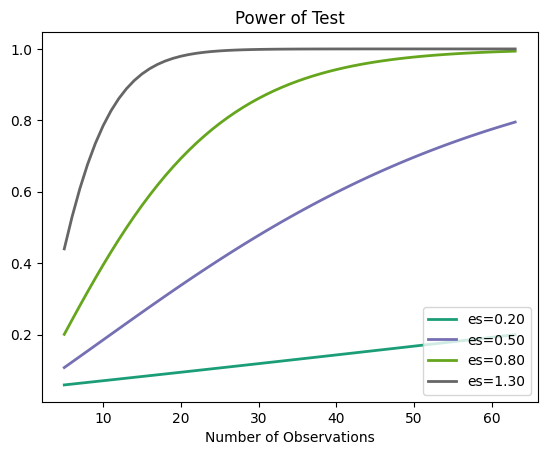

# 3. Dependent-samples t-test

It compares the means between two related groups on the same continuous, dependent variable.

## Dependent-samples t-test: Assumptions

* Dependent variable measured on a continuous scale (i.e., it is measured at the interval or ratio level).
* Independent variable consists of two categorical, "related groups" or "matched pairs" (comparing measurements or observations within the same subjects or items).
* No significant outliers in the differences between the two related groups.
* The dependent variable's differences between the two related groups should have a distribution that is normally distributed.

# Normality

* Before running the data we have to do the Normality Test

* To check if the data is normal use scipy.stats.normaltest

* Test whether a sample differs from a normal distribution.

* This function tests the null hypothesis that a sample comes from a normal distribution.

* It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

* if the p value reported is higher than 0.05 we accept the hypothesis that the data is normally distirbuted.

## Reporting Examples

The following examples gives a reference to the structure on how to report the results.

1. A one-sample t-test was run to determine whether depression score in recruited subjects was different to normal, defined as a depression score of 4.0. Depression scores were normally distributed, as assessed by Shapiro-Wilk's test (p > .05) and there were no outliers in the data, as assessed by inspection of a boxplot. Mean depression score (M = 3.73, SD = 0.74) was lower than the normal depression score of 4.0, a statistically significant mean difference of 0.28, 95% CI [0.04 to 0.51], t(39) = -2.381, p = .022.

2. This study found that overweight, physically inactive male participants had statistically significantly lower cholesterol concentrations (5.80 ± 0.38 mmol/L) at the end of an exercise-training programme compared to after a calorie-controlled diet (6.15 ± 0.52 mmol/L), t(38)=2.428, p=0.020.

To calculate the degrees of freedom of t value t(df):

* One-sample: $n−1$
* Independent-samples: $(n_{1}+n_{2})−2$
* Dependent-samples:$n−1$

where $n$ is the sample size.

In [ ]:

stats.ttest_rel(female_viq, male_viq, alternative='two-sided')

TtestResult(statistic=-0.7757651537250586, pvalue=0.44743691639488103, df=19)

## Practice Exercise

Read the scenarios, visualize the appropriate data and answer the following for all of them.

a. State the null and alternative hypotheses.

b. What t-test is most appropriate to test the claim?

c. Conduct the appropriate statistical test and report the relevant output here.

d. What is the decision about the null hypothesis? Justify your answer.

e. Report your conclusion.

You can refer to the following data set file "t_testpractice.xlsx". <br><br>
